In [1]:
import os

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

from ModelComponents.MFCCArchitectures import MLP
from ModelComponents.dataset import FolderAudioDataset
from ModelComponents.training import train
from ModelComponents.utils import plot_training_curves

## Define training arguments

In [2]:
datasets_path = "../examples"
preprocessed_path = os.path.join(datasets_path,"preprocessed/")
checkpoint_path = '../models/MLPv0.pth'
training_plot_save_path = '../results/MLPPerformance.png'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dropout_p = 0.3

model_MLP = MLP(dropout_p=dropout_p).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_MLP.parameters(), lr=0.001)

num_epochs = 10
batch_size = 4
noise_prob_train = 0.7
noise_prob_test = 0

In [3]:
data_train = FolderAudioDataset(os.path.join(preprocessed_path,"train"), os.path.join(datasets_path,"bruits"), noise_prob=noise_prob_train)
train_loader = DataLoader(data_train, batch_size=batch_size, shuffle=True)


data_test = FolderAudioDataset(os.path.join(preprocessed_path,"test"), os.path.join(datasets_path,"bruits"), noise_prob=noise_prob_test)
test_loader = DataLoader(data_test, batch_size=batch_size, shuffle=True)

## Training

In [4]:
train_loss_list, train_acc_list, test_loss_list, test_acc_list = train(model_MLP, train_loader, test_loader, criterion, optimizer, checkpoint_path, device, num_epochs, cnn=False)

Epoch [1/10]
Train Loss: 12.6878, Train Acc: 16.67%
Test Loss: 3.5589, Test Acc: 33.33%

Best model saved with accuracy: 33.33%
Epoch [2/10]
Train Loss: 11.7947, Train Acc: 16.67%
Test Loss: 7.8225, Test Acc: 22.22%
Epoch [3/10]
Train Loss: 11.2086, Train Acc: 33.33%
Test Loss: 9.8578, Test Acc: 33.33%
Epoch [4/10]
Train Loss: 10.2431, Train Acc: 16.67%
Test Loss: 5.9582, Test Acc: 38.89%

Best model saved with accuracy: 38.89%
Epoch [5/10]
Train Loss: 12.1892, Train Acc: 27.78%
Test Loss: 6.7213, Test Acc: 38.89%
Epoch [6/10]
Train Loss: 4.3387, Train Acc: 44.44%
Test Loss: 8.2130, Test Acc: 33.33%
Epoch [7/10]
Train Loss: 7.7123, Train Acc: 27.78%
Test Loss: 3.0917, Test Acc: 33.33%
Epoch [8/10]
Train Loss: 4.7802, Train Acc: 33.33%
Test Loss: 1.3159, Test Acc: 38.89%
Epoch [9/10]
Train Loss: 4.7827, Train Acc: 38.89%
Test Loss: 1.3297, Test Acc: 55.56%

Best model saved with accuracy: 55.56%
Epoch [10/10]
Train Loss: 4.9568, Train Acc: 33.33%
Test Loss: 2.1356, Test Acc: 50.00%


Plot saved to ../results/MLPPerformance.png


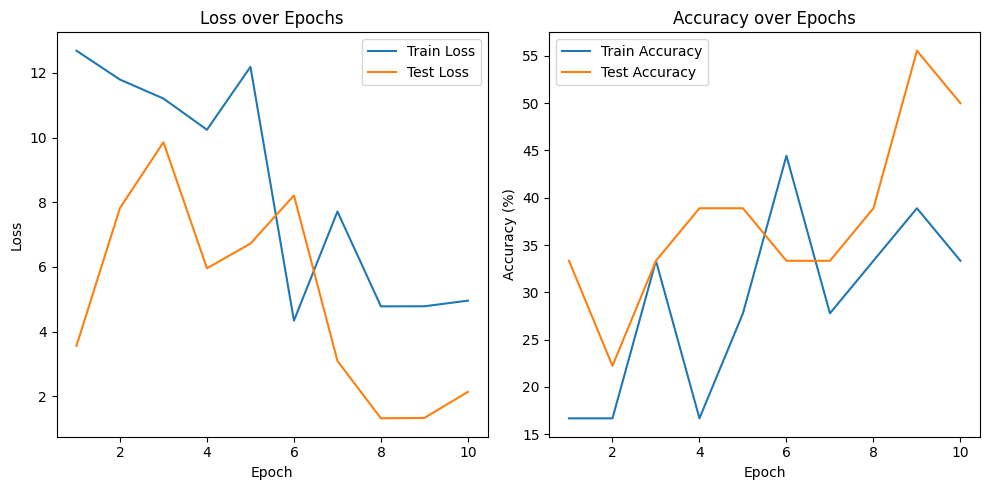

In [5]:
plot_training_curves(train_loss_list, test_loss_list, train_acc_list, test_acc_list, num_epochs, training_plot_save_path)